# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [2]:
import pandas as pd
import numpy as np

In [3]:
artist_data = pd.read_csv("../data/lastFm/artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [4]:
user_artist_plays = pd.read_csv("../data/lastfm/user_artists.dat", sep="\t")
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [5]:
tags = pd.read_csv("../data/lastfm/tags.dat", sep="\t", encoding = "ISO-8859-1")
tags

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal
...,...,...
11941,12644,suomi
11942,12645,symbiosis
11943,12646,sverige
11944,12647,eire


In [6]:
user_tagged_artists = pd.read_csv("../data/lastfm/user_taggedartists.dat", sep="\t", encoding = "ISO-8859-1")
user_tagged_artists.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando, quienes estén realizando la materia completa, deberán realizar ambas partes.

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

### 1.1. Artistas más escuchados

In [7]:
user_artist_plays_by_artist = user_artist_plays[["artistID", "weight"]].groupby(['artistID']).sum().sort_values(by=["weight"], ascending=False)

artist_plays = user_artist_plays_by_artist.merge(artist_data, left_on="artistID", right_on="id")

artist_plays.head(10)


,weight,id,name,url,pictureURL
0,2393140,289,Britney Spears,http://www.last.fm/music/Britney+Spears,http://userserve-ak.last.fm/serve/252/60126439...
1,1301308,72,Depeche Mode,http://www.last.fm/music/Depeche+Mode,http://userserve-ak.last.fm/serve/252/75022.jpg
2,1291387,89,Lady Gaga,http://www.last.fm/music/Lady+Gaga,http://userserve-ak.last.fm/serve/252/47390093...
3,1058405,292,Christina Aguilera,http://www.last.fm/music/Christina+Aguilera,http://userserve-ak.last.fm/serve/252/47363849...
4,963449,498,Paramore,http://www.last.fm/music/Paramore,http://userserve-ak.last.fm/serve/252/35837991...
5,921198,67,Madonna,http://www.last.fm/music/Madonna,http://userserve-ak.last.fm/serve/252/340387.jpg
6,905423,288,Rihanna,http://www.last.fm/music/Rihanna,http://userserve-ak.last.fm/serve/252/53023109...
7,688529,701,Shakira,http://www.last.fm/music/Shakira,http://userserve-ak.last.fm/serve/252/52116105...
8,662116,227,The Beatles,http://www.last.fm/music/The+Beatles,http://userserve-ak.last.fm/serve/252/2588646.jpg
9,532545,300,Katy Perry,http://www.last.fm/music/Katy+Perry,http://userserve-ak.last.fm/serve/252/42128121...


### 1.2. Distribución de cantidad de listens por user

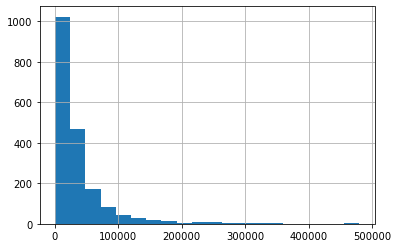

In [8]:
user_artist_plays_by_user = user_artist_plays[["userID", "weight"]].groupby(['userID']).sum()

user_artist_plays_by_user["weight"].hist(bins = 20)

### 1.3. Géneros más escuchados

In [9]:
user_artist_plays_by_artist_tags = artist_plays.merge(user_tagged_artists, left_on="id", right_on="artistID")
tags_plays = user_artist_plays_by_artist_tags[["tagID", "weight"]].groupby(['tagID']).sum()
tags_plays_merge = tags_plays.merge(tags, on="tagID").sort_values(by=["weight"], ascending=False)
tags_plays_merge.head()

,tagID,weight,tagValue
23,24,1043039517,pop
71,73,622063102,rock
122,130,611535548,female vocalists
38,39,569648216,dance
77,79,403229595,alternative


## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa deerán realizar también el [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). 

Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [10]:
user_artist_plays_sorted = user_artist_plays.groupby(["userID"]).apply(lambda x: x.sort_values(["weight"],ascending = False)).reset_index(drop = True)

In [11]:
user_artist_plays_top = user_artist_plays.groupby(["userID"]).head(30)

In [12]:
user_artist_plays_top["rating"] = pd.cut(user_artist_plays_top["weight"], 5, [0, 1000, 10000, 200000, 350000, 400000], labels=["1", "2", "3", "4", "5"],include_lowest=True)

In [13]:
user_artist_plays_top

,userID,artistID,weight,rating
0,2,51,13883,1
1,2,52,11690,1
2,2,53,11351,1
3,2,54,10300,1
4,2,55,8983,1
...,...,...,...,...
92809,2100,8320,284,1
92810,2100,8322,650,1
92811,2100,8323,456,1
92812,2100,8324,1068,1


### Ejecicio 2.a

In [14]:
# Importación de librerías necesarias.
from surprise import Dataset, Reader, KNNWithMeans, NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split

### 2.a.1. Matriz de contenido

In [15]:
reader = Reader(rating_scale=(1, 5))

ratings = Dataset.load_from_df(user_artist_plays_top[["userID", "artistID", "rating"]], reader)

### 2.a.2 Entrenamiento y análisis de algoritmos de recomendación

In [16]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, ratings, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [17]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [18]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.043340,0.125318,0.132025
KNNBasic,0.045950,0.293675,1.947336
NMF,0.046081,3.074689,0.166002
KNNWithZScore,0.046627,0.381953,2.170016
KNNWithMeans,0.046822,0.365635,2.258347
KNNBaseline,0.046910,0.398985,2.271023
SlopeOne,0.047623,0.595004,0.404669
SVDpp,0.053477,15.611185,0.647657
NormalPredictor,0.055812,0.089670,0.225647


In [19]:
ratings_train, ratings_test = train_test_split(ratings, test_size=0.2)
sim_options = {'name': 'pearson_baseline', 'user_based': False}
model = SVDpp(random_state=42)
model.fit(ratings_train)
predictions = model.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

RMSE on test: 0.0362


In [20]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(ratings_train.ur[ratings_train.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(ratings_train.ir[ratings_train.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [21]:
df_predictions.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,1457,475,1.0,1.000000,{'was_impossible': False},25,157,0.000000
1,1090,12231,1.0,1.000000,{'was_impossible': False},25,0,0.000000
2,1249,245,1.0,1.009583,{'was_impossible': False},23,25,0.009583
3,846,3442,1.0,1.000000,{'was_impossible': False},21,3,0.000000
4,521,209,1.0,1.012184,{'was_impossible': False},24,122,0.012184


In [22]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]

In [23]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
0,1457,475,1.0,1.0,{'was_impossible': False},25,157,0.0
6207,1872,693,1.0,1.0,{'was_impossible': False},22,23,0.0
6205,1513,3057,1.0,1.0,{'was_impossible': False},23,22,0.0
6204,1498,867,1.0,1.0,{'was_impossible': False},23,20,0.0
6203,333,295,1.0,1.0,{'was_impossible': False},24,307,0.0
6202,1923,1249,1.0,1.0,{'was_impossible': False},24,96,0.0
6201,849,1239,1.0,1.0,{'was_impossible': False},26,47,0.0
6199,1997,735,1.0,1.0,{'was_impossible': False},19,106,0.0
6197,1989,18036,1.0,1.0,{'was_impossible': False},22,0,0.0
6196,336,2831,1.0,1.0,{'was_impossible': False},24,1,0.0


In [24]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
7728,1094,735,1.0,1.191185,{'was_impossible': False},23,106,0.191185
9584,1094,166,1.0,1.211567,{'was_impossible': False},23,56,0.211567
7597,1905,1171,1.0,1.229407,{'was_impossible': False},26,4,0.229407
9812,1642,14752,1.0,1.235365,{'was_impossible': False},25,1,0.235365
5322,536,792,1.0,1.283254,{'was_impossible': False},22,12,0.283254
10103,735,792,1.0,1.285757,{'was_impossible': False},23,12,0.285757
665,767,72,2.0,1.055973,{'was_impossible': False},23,218,0.944027
6146,1339,65,2.0,1.029472,{'was_impossible': False},26,299,0.970528
2919,1368,486,2.0,1.016414,{'was_impossible': False},23,170,0.983586
9399,1146,378,3.0,1.010600,{'was_impossible': False},20,178,1.989400


### 2.a.3 Sistema de recomendación

In [25]:
from collections import defaultdict
from collections import Counter

def get_top_n_similar(predictions, artistID, n=10):
    # Mapeo de predicciones por cada usuario
    top_n = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Se toman las 10 primeras predicciones de cada usuario
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    # Se recorren para todos los usuarios, aquellas listas en las que aparece el artista, y se eligen los 10 más frecuentes.
    artistIDs = []
    for uid, user_ratings in top_n.items():
        agregarIds = False
        for rating in user_ratings:
            iid = rating[0]
            if (iid == artistID):
                agregarIds = True
                break
        if (agregarIds == True):
            for rating in user_ratings:
                artistIDs.append(rating[0])

    list_freq = (Counter(artistIDs)).most_common(10)

    return list_freq

In [26]:
def print_top_10_similar(artist_name):
    artistID = artist_data[artist_data["name"].str.lower() == artist_name.lower()].id.item()

    top_n_similar = get_top_n_similar(predictions, artistID, 10)

    for key, value in top_n_similar:
        if (key != artistID):
            print(artist_data[artist_data["id"] == key].name.item())

In [27]:
print_top_10_similar("The Rolling Stones")

The Beatles
Eric Clapton
The Doors
Elvis Presley
John Lennon
Led Zeppelin
The White Stripes
The Strokes
Foo Fighters


### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

### 2.b.1 Evaluación sobre cold start
Para abordar el problema de cold start, el análisis se realizó sobre los tags asignados a los artistas. Se resolvió trabajar sólo con las primeras 3 tags más relevantes de cada artista.

In [28]:
user_tagged_artists_count = user_tagged_artists[["artistID", "tagID"]]
user_tagged_artists_count["count"] = user_tagged_artists_count.groupby(["artistID", "tagID"])["tagID"].transform("count")
user_tagged_artists_count = user_tagged_artists_count.drop_duplicates()
user_tagged_artists_count = user_tagged_artists_count.groupby(["artistID"]).apply(lambda x: x.sort_values(["count"],ascending = False)).reset_index(drop = True)

user_tagged_artists_count = user_tagged_artists_count.groupby("artistID").head(3)

In [29]:
user_tagged_artists_count.head()

,artistID,tagID,count
0,1,139,5
1,1,141,3
2,1,179,2
7,2,575,8
8,2,30,5


Luego, sobre el dataset que contiene los 3 tags más frecuentes de cada artista se hace una operación "merge" con los tags para tener los nombres de cada género.

In [30]:
# Merge con Tags para tener los nombres de tags
artists_tags_top = user_tagged_artists_count.merge(tags, on="tagID").drop_duplicates()

artists_tags_top.head()

,artistID,tagID,count,tagValue
0,1,139,5,j-rock
1,4,139,6,j-rock
2,8,139,8,j-rock
3,372,139,1,j-rock
4,376,139,5,j-rock


### 2.b.2 Vector de contenido

Para armar el vector de contenido, se tomará una lista de valores únicos de aquellos tags que se encuentran en el dataset que almacena los 3 tags más frecuentes por cada artista. 

In [31]:
used_tags = artists_tags_top['tagValue'].drop_duplicates()
used_tags

0                j-rock
66           visual kei
129              gothic
218            darkwave
280              german
              ...      
32403             ustad
32404         a capella
32405    massive attack
32406         trip beat
32407        dead music
Name: tagValue, Length: 2821, dtype: object

El vector de contenido será resultado de una transformación del dataset "artists_tags_top", agregando una columna por cada género (tag) y quitando las restantes columnas.

In [32]:
# Vector de contenido.
for g in used_tags:
    artists_tags_top[g] = artists_tags_top.tagValue.transform(lambda x: int(g in x))
   
artists_tags_transform = artists_tags_top.drop(columns=['tagValue', 'count', 'artistID', 'tagID'])
artists_tags_transform.head()

,j-rock,visual kei,gothic,darkwave,german,black metal,true norwegian black metal,norwegian black metal,japanese,gothic rock,...,ou nao,batcave deathrock,stoner power rock,italodance,amazing singer,ustad,a capella,massive attack,trip beat,dead music
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.b.3 Sistema de recomendación

El sistema de recomendación utilizará la implementación de Similitud Coseno de sklearn como métrica de cálculo.

In [33]:
# Cálculo de similitud coseno
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(artists_tags_transform, artists_tags_transform)

In [38]:
# Sistema de recomendación
def artists_finder(artist_name):
    artists_idx = dict(zip(artist_data['name'], list(artist_data.index)))
    n_recommendations = 10

    idx = artists_idx[artist_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_artists = [i[0] for i in sim_scores]

    print("Artistas similares para {}:".format(artist_name))
    for artist in artist_data['name'].iloc[similar_artists]:
        print("\t{}".format(artist))

In [39]:
artists_finder("The Beatles")

Artistas similares para The Beatles:
	Interpol
	Queens of the Stone Age
	The Beatles
	Kings of Leon
	The Killers
	Green Day
	Devendra Banhart
	Sunset Rubdown
	Nine Inch Nails
	Nirvana


### 2.b.4 Evaluación manual del sistema